In [28]:
# import packages
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [29]:
# for display outputs and images
def display_images(in_, out, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, 28, 28)
            plt.figure(figsize=(18, 4))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = out.data.cpu().view(-1, 28, 28)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [30]:
# Set random seeds
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [31]:
# Define data loading step
batch_size = 256
kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu:0")

In [33]:
# define our vanilla autoencoder very simple to generate data
class AE(nn.Module):

    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(   # encoder 784 to 2 dimention
            nn.Linear(784,100),
            nn.ReLU(),
            nn.Linear(100,2))

        self.decoder = nn.Sequential(   # decoder 2 to 784 deimetion
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 784),
            nn.Sigmoid()
        )


    def forward(self, x):
        a = self.encoder(x.view(-1, 784))
        out = self.decoder(a)
        return a, out



In [34]:
model = AE().to(device)

In [35]:
# Setting the optimiser
learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

In [41]:
# Reconstruction loss function for our autoencoder
def loss_function(x_hat, x):
    BCE = nn.functional.binary_cross_entropy(
        x_hat, x.view(-1, 784), reduction='sum'
    )
    return BCE

In [133]:
# Training and testing the VAE

epochs = 10

for epoch in range(0, epochs):
    # Training
    train_loss = 0
    model.train()
    for x, y in train_loader:
        x = x.to(device)
        a, x_hat = model(x)
        loss = loss_function(x_hat, x)
        train_loss += loss.item()
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y = y # for use it to plot

        # ===================log========================
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

    with torch.no_grad():
        model.eval()
        test_loss = 0
        for x,_ in test_loader:
            x = x.to(device)
            # ===================forward=====================
            _, x_hat = model(x)
            test_loss += loss_function(x_hat, x).item()     

    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')  


    

====> Epoch: 0 Average loss: 147.0120
====> Test set loss: 148.5367


In [134]:
print(a[1,:])
print(y[1])

tensor([-1.3386, -9.0180], device='cuda:0', grad_fn=<SliceBackward>)
tensor(5)


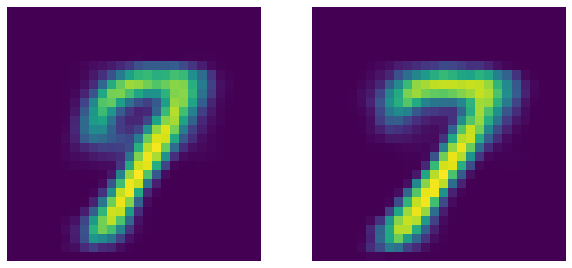

In [111]:
# two diffrent but near input for decoder make  near output (2 diffrent 7 number)
in_ex = torch.tensor([-15, -23.2373]).to(device)
in_ex2 = torch.tensor([-17, -23.2]).to(device)
sample1 = model.decoder(in_ex)
sample2 = model.decoder(in_ex2)
rec_pic1 = sample1.data.cpu().view(-1, 28, 28)
rec_pic2 = sample2.data.cpu().view(-1, 28, 28)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(rec_pic1[0,:,:])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(rec_pic2[0,:,:])
plt.axis("off")
plt.show()


In [135]:
y.shape

torch.Size([96])

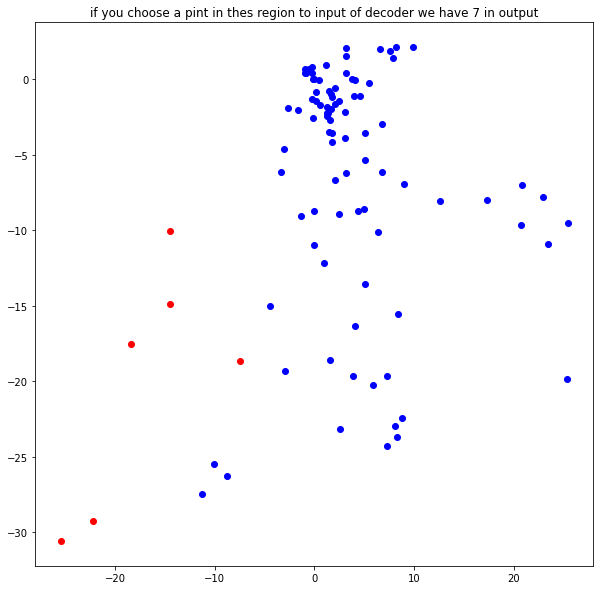

In [146]:
# show region in decoder input map to numbers in outpue (here we use 7 you can change it with colors of scatter)

yshow = a.data.cpu()
plt.figure(figsize=(10,10))

for j in range(96):
        
    if y[j] == 0:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 1:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 2:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 3:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 4:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 5:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 6:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 7:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'r')
    elif y[j] == 8:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')
    elif y[j] == 9:
        plt.scatter(yshow[j,0],yshow[j,1], color = 'b')

plt.title("if you choose a pint in red point region to input of decoder we have 7 in output")    
plt.show()
